<a href="https://colab.research.google.com/github/yamrajkhadka/Land-Cover-Classification-from-Satellite-Images-using-U-Net-on-the-DeepGlobe-Dataset/blob/main/Implementation_of_unet_architecture_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *The implementation of unet architecture from scratch*

## 🔗 Reference: Keras Official U-Net Implementation

This is a high-quality, well-documented tutorial by the Keras team that uses U-Net for image segmentation on the Oxford Pets dataset:

📎 [Keras U-Net Tutorial - Oxford Pets Segmentation](https://keras.io/examples/vision/oxford_pets_image_segmentation/)


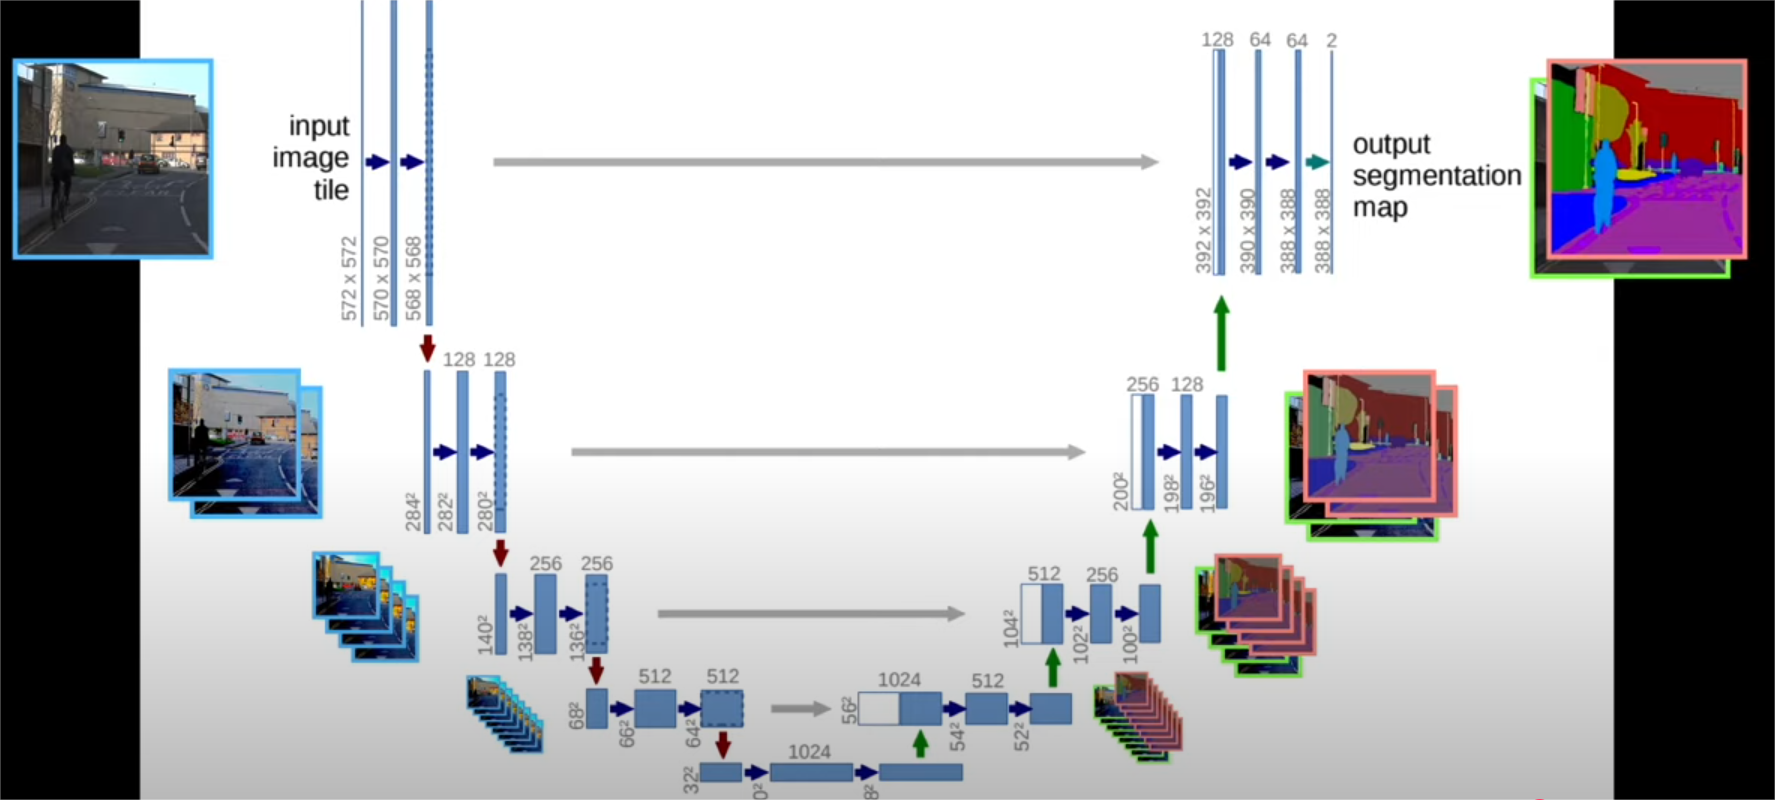

In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, Input, concatenate, BatchNormalization, Activation
from tensorflow.keras.models import Model

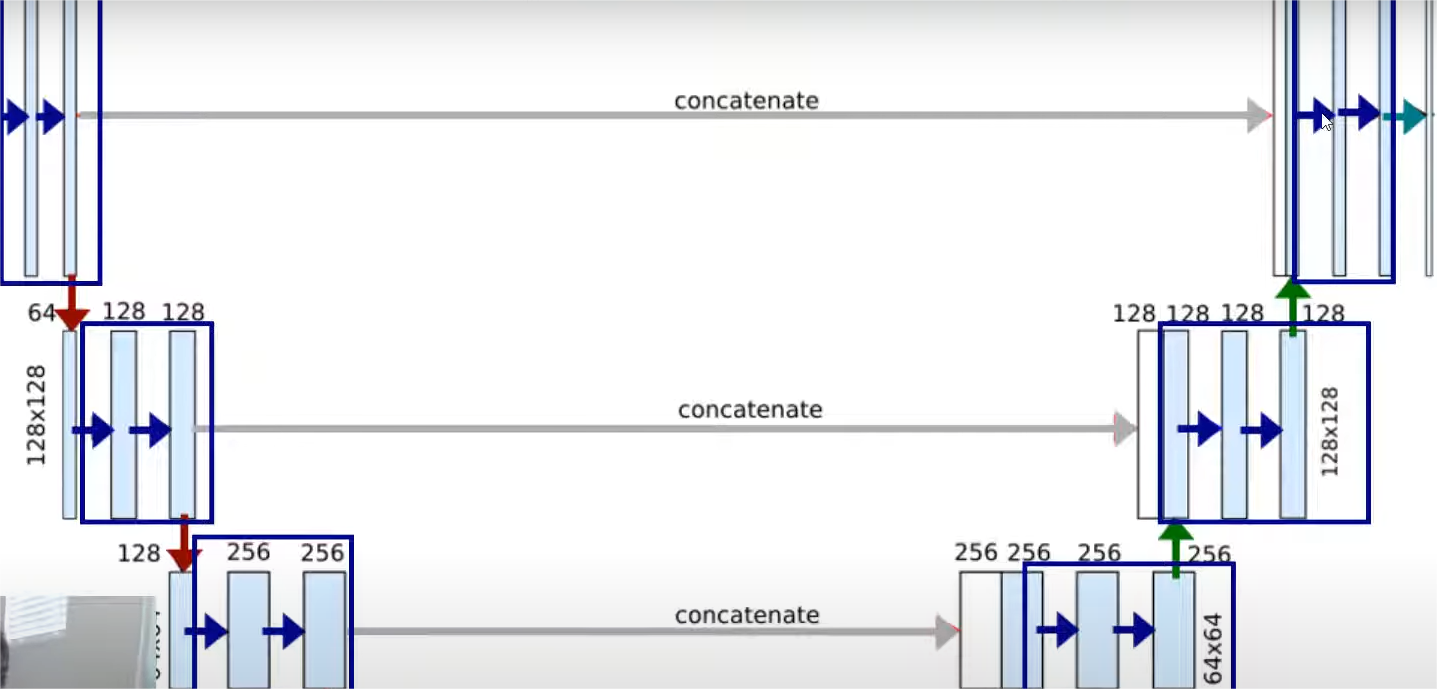

In [ ]:


def convo_block(input,num_filters):
  x=Conv2D(num_filters,kernel_size=(3,3),padding="same")(input) #kernal(filters) slides over i/p to extract features..basically
  #it assign random 3*3 matrix and multifly with i/p and then sum with i/p with stride=1 and padding=0;so 0/p size is smaller

  x=BatchNormalization()(x) #this is not included in the original paper of unet
  x=Activation("relu")(x)

  x=Conv2D(num_filters,kernel_size=(3,3),padding="same")(x)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)
  return x

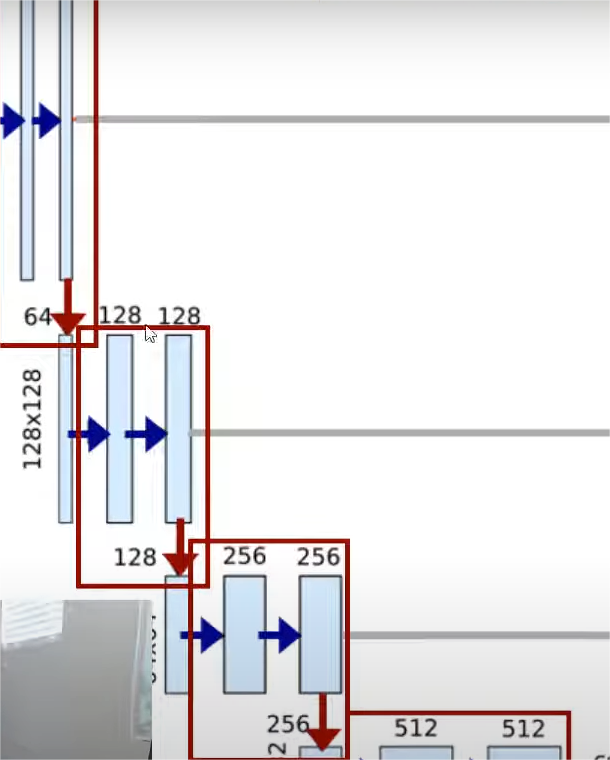

In [ ]:


def encoder_block(input,num_filters):
  x=convo_block(input,num_filters)
  p=MaxPooling2D((2,2))(x) #takes max_value from 2*2 region thus, result in downsampling
  return x,p

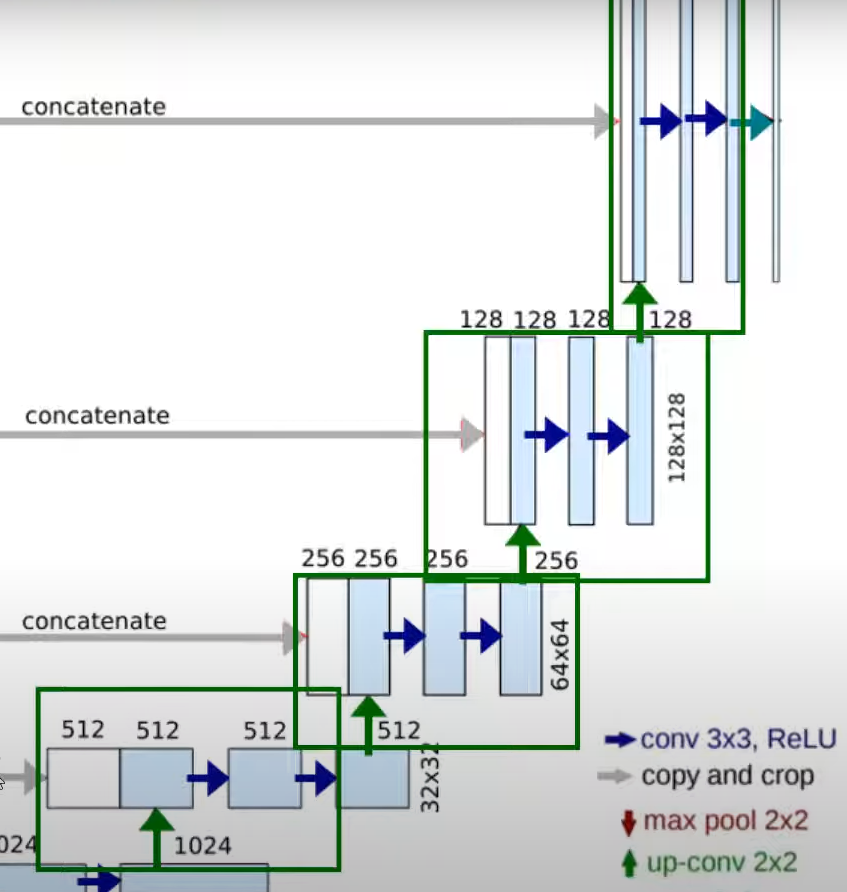

In [ ]:


def decoder_block(input,skip_features,num_filters):
  x=Conv2DTranspose(num_filters,kernel_size=(2,2),strides=2,padding="same")(input) #upscaling
  x=concatenate([x,skip_features])
  x=convo_block(x,num_filters)
  return x

In [ ]:


def build_unet(input_shape):
  inputs=Input(input_shape)

  s1,p1=encoder_block(inputs,64)
  s2,p2=encoder_block(p1,128)
  s3,p3=encoder_block(p2,256)
  s4,p4=encoder_block(p3,512)

  b1=convo_block(p4,1024)

  d1=decoder_block(b1,s4,512)
  d2=decoder_block(d1,s3,256)
  d3=decoder_block(d2,s2,128)
  d4=decoder_block(d3,s1,64)

  outputs=Conv2D(1,kernel_size=(1,1),padding="same",activation="sigmoid")(d4)
  model=Model(inputs,outputs,name="unet")
  return model

In [ ]:


# check if model is working
model = build_unet((128,128,3))
model.summary()


Model: "unet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_76[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_72       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 128, 128,  │     36,928 │ activation_72[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_77[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_73       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 64, 64,    │          0 │ activation_73[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_16… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_78[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_74       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 64, 64,    │    147,584 │ activation_74[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_79[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_75       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 32, 32,    │          0 │ activation_75[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_17… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_80[0][0] 

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)